In [1]:
# !pip3 install --pre torch torchvision torchaudio --index-url https://download.pytorch.org/whl/nightly/cu128
# !pip install pandas
# !pip install tqdm
# !pip install matplotlib
# !pip install opencv-python

In [2]:
# Required Libraries
import os
import random
import shutil
import torch
from collections import defaultdict
import pandas as pd

# Dataset Pre Processing (JAFFE)

In [4]:
# def split_dataset(source_dir, destination_dir, file_extension, csv_path, train_ratio=0.6, val_ratio=0.2, test_ratio=0.2):
#     '''
#     Description:
#         This function splits a dataset into training, validation, and test sets by randomly selecting images and copying them over to the specified directories, organized into subdirectories based on the emotion label with the highest score.

#     Parameters:
#         source_dir (str): The directory containing the original dataset.
#         destination_dir (str): The directory to copy the training/testing/validation sets to.
#         file_extension (str): The file extension of the images in the dataset.
#         csv_path (str): Path to the CSV file containing emotion scores for each image.
#         train_ratio (float): The ratio of the dataset to include in the training set.
#         val_ratio (float): The ratio of the dataset to include in the validation set.
#         test_ratio (float): The ratio of the dataset to include in the test set.
    
#     Returns:
#         None
#     '''
    
#     # Validate ratios
#     assert abs(train_ratio + val_ratio + test_ratio) == 1, "Ratios must sum to 1"
    
#     # Mapping for folder names
#     folder_mapping = {'test': 'test', 'train': 'train', 'validation': 'val'}

#     # Ensure the mapping mathches the dataset
#     label_mapping = {
#         "HAP": 0,
#         "SUR": 1,
#         "SAD": 2,
#         "ANG": 3,
#         "DIS": 4,
#         "FEA": 5,
#         # "neutral": 6
#     }

#     train_dir = os.path.join(destination_dir, 'train')
#     val_dir = os.path.join(destination_dir, 'validation')
#     test_dir = os.path.join(destination_dir, 'test')

#     # Create directories
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(val_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)
    
#     # Read emotion mapping from CSV
#     emotion_mapping = {}
#     emotions = ['HAP', 'SAD', 'SUR', 'ANG', 'DIS', 'FEA']
    
#     with open(csv_path, 'r') as f:
#         next(f)  # Skip header
#         for line in f:
#             parts = line.strip().split()
#             if len(parts) < 8: continue
#             pic = parts[7]
#             scores = list(map(float, parts[1:7]))
#             emotion = emotions[scores.index(max(scores))]
#             emotion_mapping[pic] = emotion
    
#     # Group files by emotion
#     emotion_groups = defaultdict(list)
#     all_files = [f for f in os.listdir(source_dir) if f.lower().endswith(file_extension.lower())]
    
#     for file_name in all_files:
#         base = os.path.splitext(file_name)[0].replace('.', '-', 1).split('.')[0]
#         if base in emotion_mapping:
#             emotion_groups[emotion_mapping[base]].append(file_name)
    
#     # Stratified splitting
#     train_files, val_files, test_files = [], [], []
    
#     for emotion, files in emotion_groups.items():
#         random.shuffle(files)
#         n = len(files)
#         train_end = int(n * train_ratio)
#         val_end = train_end + int(n * val_ratio)
        
#         train_files.extend(files[:train_end])
#         val_files.extend(files[train_end:val_end])
#         test_files.extend(files[val_end:])
    
#     # Final shuffle to mix emotions
#     random.shuffle(train_files)
#     random.shuffle(val_files)
#     random.shuffle(test_files)
    
#     # Copy files with emotion subdirectories
#     def copy_split(files, target_dir):
#         for fname in files:
#             base = os.path.splitext(fname)[0].replace('.', '-', 1).split('.')[0]
#             emotion = emotion_mapping.get(base)
#             if not emotion: continue
#             dest = os.path.join(target_dir, emotion, fname)
#             os.makedirs(os.path.dirname(dest), exist_ok=True)
#             shutil.copy(os.path.join(source_dir, fname), dest)
    
#     copy_split(train_files, train_dir)
#     copy_split(val_files, val_dir)
#     copy_split(test_files, test_dir)

#     # Iterate over the folders (test, train, validation)
#     for folder in ['test', 'train', 'validation']:
#         folder_path = os.path.join(destination_dir, folder)
        
#         # Iterate over the class folders inside each folder
#         for class_folder in os.listdir(folder_path):
#             class_folder_path = os.path.join(folder_path, class_folder)
            
#             # Iterate over the images in the class folder
#             for index, image in enumerate(os.listdir(class_folder_path)):
#                 # Get the image name and extension
#                 image_name, image_ext = os.path.splitext(image)
                
#                 # Construct the new image name
#                 new_image_name = f"{folder_mapping[folder]}_{index}_{class_folder}{image_ext}"
                
#                 # Rename the image and move it to the destination folder
#                 shutil.move(os.path.join(class_folder_path, image), os.path.join(destination_dir, folder, new_image_name))

#         image_data = []

#         # Make sure the name of the file is partition_iteration_emotion.jpg or .png
#         for filename in os.listdir(folder_path):
#             if filename.endswith(file_extension):  
#                 label_name = filename.split('_')[-1].split('.')[0]
#                 label_value = label_mapping.get(label_name)
#                 if label_value is not None:  
#                     image_data.append([filename, label_value])

#         df = pd.DataFrame(image_data, columns=["ImageName", "Label"])

#         csv_file_path = os.path.join(folder_path, f'{folder}_labels.csv')

#         df.to_csv(csv_file_path, index=False, header=False)

#     # Removing any residual empty directories
#     for foldername, subfolders, filenames in os.walk(destination_dir, topdown=False):
#         # Iterate through subdirectories
#         for subfolder in subfolders:
#             subfolder_path = os.path.join(foldername, subfolder)
#             # Check if the subfolder is empty
#             if not os.listdir(subfolder_path):  # List contents of the folder
#                 os.rmdir(subfolder_path)  # Remove empty subfolder

# # Usage remains the same
# source_directory = 'JAFFE_Dataset'
# destination_directory = 'JAFFE_ResEmoteNet'
# file_extension = 'tiff'
# csv_path = 'JAFFE_Dataset/mapping.csv'

# split_dataset(source_directory, destination_directory, file_extension, csv_path)

In [5]:
import os
import torch
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

# Dataset class for the custom dataset
class Four4All(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
            
        img_name = os.path.join(self.img_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

# ResEmoteNet Model

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1, 1)
        return x * y.expand_as(x)
    
    
class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_ch)
        self.conv2 = nn.Conv2d(out_ch, out_ch, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(out_ch)
        
        self.shortcut = nn.Sequential()
        if stride != 1 or in_ch != out_ch:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=1, stride=stride, padding=0),
                nn.BatchNorm2d(out_ch)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    
    
class ResEmoteNet(nn.Module):
    def __init__(self):
        super(ResEmoteNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.relu = nn.ReLU(inplace=True)
        self.se = SEBlock(256)
        
        self.res_block1 = ResidualBlock(256, 512, stride=2)
        self.res_block2 = ResidualBlock(512, 1024, stride=2)
        self.res_block3 = ResidualBlock(1024, 2048, stride=2)
        
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.5)
        # self.fc4 = nn.Linear(256, 6) #Changed from 7 to 6 to match the JAFFE label count
        self.fc4 = nn.Linear(256, 7)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.max_pool2d(x, 2)
        x = self.se(x)
        
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))
        x = self.dropout2(x)
        x = self.fc4(x)
        return x

# ResEmoteNet Training (JEFFE)

In [ ]:
# import torch
# import pandas as pd
# import numpy as np
# from tqdm import tqdm
# from torch.utils.data import DataLoader
# from torchvision import transforms
# import torch.optim as optim
# import matplotlib.pyplot as plt

# # Device configuration
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} device")

# # Hyperparameter grid for tuning
# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]
# momentums = [0.9, 0.95]
# weight_decays = [1e-4, 1e-5]

# # Best hyperparameter configuration variables
# best_val_acc = 0
# best_lr = None
# best_bs = None
# best_momentum = None
# best_wd = None

# # Placeholder for storing results
# results = []

# # Transform the dataset
# transform = transforms.Compose([
#     transforms.Resize((64, 64)),
#     transforms.Grayscale(num_output_channels=3),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
#     transforms.Normalize( #Consider changing the mean and std
#         mean=[0.485, 0.456, 0.406],
#         std=[0.229, 0.224, 0.225]
#     )
# ])

# data_directory = 'JAFFE_ResEmoteNet'

# # Load the dataset
# train_dataset = Four4All(csv_file=data_directory+'/train/train_labels.csv',
#                          img_dir=data_directory+'/train', transform=transform)

# val_dataset = Four4All(csv_file=data_directory+'/validation/validation_labels.csv', 
#                        img_dir=data_directory+'/validation/', transform=transform)

# test_dataset = Four4All(csv_file=data_directory+'/test/test_labels.csv', 
#                         img_dir=data_directory+'/test', transform=transform)

# # Loop over the grid of hyperparameters
# for lr in learning_rates:
#     for batch_size in batch_sizes:
#         for momentum in momentums:
#             for wd in weight_decays:
#                 print(f"\nRunning grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                
#                 # Load the dataset with the current batch_size
#                 train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#                 val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
#                 test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#                 # Reinitialize the model
#                 model = ResEmoteNet().to(device)
#                 # model.fc4 = nn.Linear(256, 6) #Changed to map correctly to the JEFFA dataset

#                 # Hyperparameters
#                 criterion = torch.nn.CrossEntropyLoss()
#                 optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)

#                 # Training parameters
#                 patience = 15
#                 patience_counter = 0
#                 epoch_counter = 0
#                 num_epochs = 80

#                 train_losses = []
#                 val_losses = []
#                 train_accuracies = []
#                 val_accuracies = []
#                 test_losses = []
#                 test_accuracies = []

#                 # Start training
#                 for epoch in range(num_epochs):
#                     model.train()
#                     running_loss = 0.0
#                     correct = 0
#                     total = 0

#                     for data in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
#                         inputs, labels = data[0].to(device), data[1].to(device)

#                         optimizer.zero_grad()
#                         outputs = model(inputs)
#                         loss = criterion(outputs, labels)
#                         loss.backward()
#                         optimizer.step()

#                         running_loss += loss.item()
#                         _, predicted = torch.max(outputs.data, 1)
#                         total += labels.size(0)
#                         correct += (predicted == labels).sum().item()

#                     train_loss = running_loss / len(train_loader)
#                     train_acc = correct / total
#                     train_losses.append(train_loss)
#                     train_accuracies.append(train_acc)

#                     # Validation evaluation
#                     model.eval()
#                     val_running_loss = 0.0
#                     val_correct = 0
#                     val_total = 0
#                     with torch.no_grad():
#                         for data in val_loader:
#                             inputs, labels = data[0].to(device), data[1].to(device)
#                             outputs = model(inputs)
#                             loss = criterion(outputs, labels)
#                             val_running_loss += loss.item()
#                             _, predicted = torch.max(outputs.data, 1)
#                             val_total += labels.size(0)
#                             val_correct += (predicted == labels).sum().item()

#                     val_loss = val_running_loss / len(val_loader)
#                     val_acc = val_correct / val_total
#                     val_losses.append(val_loss)
#                     val_accuracies.append(val_acc)

#                     print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
#                     epoch_counter += 1

#                     if val_acc > best_val_acc:
#                         best_val_acc = val_acc
#                         patience_counter = 0
#                         torch.save(model.state_dict(), f'best_model_{lr}_{batch_size}_{momentum}_{wd}.pth')
#                     else:
#                         patience_counter += 1
#                         print(f"No improvement in validation accuracy for {patience_counter} epochs.")
                    
#                     if patience_counter > patience:
#                         print("Stopping early due to lack of improvement in validation accuracy.")
#                         break

#                 # Store the results for this hyperparameter combination
#                 results.append({
#                     'lr': lr,
#                     'batch_size': batch_size,
#                     'momentum': momentum,
#                     'weight_decay': wd,
#                     'best_val_acc': best_val_acc,
#                     'train_losses': train_losses,
#                     'val_losses': val_losses,
#                     'train_accuracies': train_accuracies,
#                     'val_accuracies': val_accuracies
#                 })

#                 print(f"Finished grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
#                 print(f"Best validation accuracy: {best_val_acc}\n")

# # Convert results to DataFrame
# results_df = pd.DataFrame(results)

# # Save results to CSV for later analysis
# results_df.to_csv('hyperparameter_search_results.csv', index=False)


Using cuda device

Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 14.56it/s]


Epoch 1, Train Loss: 1.7981019914150238, Train Accuracy: 0.12903225806451613, Validation Loss: 1.790575623512268, Validation Accuracy: 0.20512820512820512


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.37it/s]


Epoch 2, Train Loss: 1.7987261712551117, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7900710105895996, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.07it/s]


Epoch 3, Train Loss: 1.7711053490638733, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7796954711278279, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.03it/s]


Epoch 4, Train Loss: 1.7626879811286926, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7703127066294353, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.14it/s]


Epoch 5, Train Loss: 1.7364657670259476, Train Accuracy: 0.23387096774193547, Validation Loss: 1.765694220860799, Validation Accuracy: 0.3076923076923077


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.24it/s]


Epoch 6, Train Loss: 1.746797889471054, Train Accuracy: 0.20161290322580644, Validation Loss: 1.757792552312215, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 1 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 7, Train Loss: 1.7445420026779175, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7390140295028687, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 8, Train Loss: 1.7262879312038422, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7295879522959392, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 9, Train Loss: 1.7123273760080338, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7301632563273113, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 10, Train Loss: 1.6985969096422195, Train Accuracy: 0.23387096774193547, Validation Loss: 1.716262420018514, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.26it/s]


Epoch 11, Train Loss: 1.702618047595024, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7146565516789753, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 12, Train Loss: 1.6742747277021408, Train Accuracy: 0.3064516129032258, Validation Loss: 1.7116588354110718, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.28it/s]


Epoch 13, Train Loss: 1.6862656772136688, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6894547541936238, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 14, Train Loss: 1.6719568520784378, Train Accuracy: 0.29838709677419356, Validation Loss: 1.681703805923462, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 15, Train Loss: 1.6449001878499985, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6670730511347454, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 16, Train Loss: 1.6485318094491959, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6594178279240925, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 17/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 17, Train Loss: 1.6516437083482742, Train Accuracy: 0.2661290322580645, Validation Loss: 1.67030135790507, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 18/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 18, Train Loss: 1.670897588133812, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6890289783477783, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 19/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 19, Train Loss: 1.6275206953287125, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6496501366297405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 20/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 20, Train Loss: 1.645598515868187, Train Accuracy: 0.31451612903225806, Validation Loss: 1.647209922472636, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 21/80: 100%|██████████| 8/8 [00:00<00:00, 17.87it/s]


Epoch 21, Train Loss: 1.6467399448156357, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6270053386688232, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.3076923076923077


Running grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.37it/s]


Epoch 1, Train Loss: 1.801451951265335, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7919289271036785, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.86it/s]


Epoch 2, Train Loss: 1.7986841201782227, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7884458700815837, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 3, Train Loss: 1.7818484157323837, Train Accuracy: 0.14516129032258066, Validation Loss: 1.782974640528361, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 4, Train Loss: 1.785432830452919, Train Accuracy: 0.20967741935483872, Validation Loss: 1.776339848836263, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 5, Train Loss: 1.7520771026611328, Train Accuracy: 0.18548387096774194, Validation Loss: 1.762859582901001, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 6, Train Loss: 1.7660893648862839, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7577165762583415, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.33it/s]


Epoch 7, Train Loss: 1.740288570523262, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7572264671325684, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.24it/s]


Epoch 8, Train Loss: 1.7215153127908707, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7399400075276692, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 9, Train Loss: 1.7005044221878052, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7329859733581543, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.48it/s]


Epoch 10, Train Loss: 1.7098631411790848, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7094047864278157, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.31it/s]


Epoch 11, Train Loss: 1.7066832333803177, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6946705182393391, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 12, Train Loss: 1.710111603140831, Train Accuracy: 0.25, Validation Loss: 1.7250522375106812, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 13, Train Loss: 1.687053069472313, Train Accuracy: 0.2661290322580645, Validation Loss: 1.70200248559316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 14, Train Loss: 1.6861772388219833, Train Accuracy: 0.2661290322580645, Validation Loss: 1.688671628634135, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.20it/s]


Epoch 15, Train Loss: 1.6599775105714798, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7221394379933674, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.72it/s]


Epoch 16, Train Loss: 1.6695131659507751, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6454766988754272, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.3076923076923077


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.05it/s]


Epoch 1, Train Loss: 1.8102440237998962, Train Accuracy: 0.12903225806451613, Validation Loss: 1.7917944192886353, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.81it/s]


Epoch 2, Train Loss: 1.7856726944446564, Train Accuracy: 0.18548387096774194, Validation Loss: 1.784099857012431, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 20.96it/s]


Epoch 3, Train Loss: 1.7710753381252289, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7734956343968709, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 21.48it/s]


Epoch 4, Train Loss: 1.7597547769546509, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7544115781784058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 22.00it/s]


Epoch 5, Train Loss: 1.7340118139982224, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7457571029663086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 21.68it/s]


Epoch 6, Train Loss: 1.7300495207309723, Train Accuracy: 0.2903225806451613, Validation Loss: 1.726625124613444, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 21.50it/s]


Epoch 7, Train Loss: 1.6991516202688217, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7300286690394084, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.96it/s]


Epoch 8, Train Loss: 1.6828318685293198, Train Accuracy: 0.25806451612903225, Validation Loss: 1.687383492787679, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 9, Train Loss: 1.6792358309030533, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7134649753570557, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 20.05it/s]


Epoch 10, Train Loss: 1.6538030207157135, Train Accuracy: 0.27419354838709675, Validation Loss: 1.665603796641032, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.18it/s]


Epoch 11, Train Loss: 1.6761431694030762, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6424578825632732, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.39it/s]


Epoch 12, Train Loss: 1.6816938519477844, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6858060359954834, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 13, Train Loss: 1.6595297157764435, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6610809961954753, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.50it/s]


Epoch 14, Train Loss: 1.6397024244070053, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6303197940190632, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.58it/s]


Epoch 15, Train Loss: 1.611605480313301, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6807450850804646, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.28it/s]


Epoch 16, Train Loss: 1.6169376224279404, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6747597455978394, Validation Accuracy: 0.358974358974359


Epoch 17/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 17, Train Loss: 1.5913148820400238, Train Accuracy: 0.33064516129032256, Validation Loss: 1.632236123085022, Validation Accuracy: 0.38461538461538464


Epoch 18/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 18, Train Loss: 1.6050019413232803, Train Accuracy: 0.31451612903225806, Validation Loss: 1.634800950686137, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 19/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 19, Train Loss: 1.5502262711524963, Train Accuracy: 0.3870967741935484, Validation Loss: 1.6215842564900715, Validation Accuracy: 0.41025641025641024


Epoch 20/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 20, Train Loss: 1.6031379252672195, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6544206937154133, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 21/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 21, Train Loss: 1.5522329658269882, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6401420831680298, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 2 epochs.


Epoch 22/80: 100%|██████████| 8/8 [00:00<00:00, 18.31it/s]


Epoch 22, Train Loss: 1.4969364255666733, Train Accuracy: 0.3467741935483871, Validation Loss: 1.5894771416982014, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 3 epochs.


Epoch 23/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 23, Train Loss: 1.4965740144252777, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5585345824559529, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 4 epochs.


Epoch 24/80: 100%|██████████| 8/8 [00:00<00:00, 18.54it/s]


Epoch 24, Train Loss: 1.4553571194410324, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5933676958084106, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 5 epochs.


Epoch 25/80: 100%|██████████| 8/8 [00:00<00:00, 18.42it/s]


Epoch 25, Train Loss: 1.4366301596164703, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5618200302124023, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 26/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 26, Train Loss: 1.3861194401979446, Train Accuracy: 0.4596774193548387, Validation Loss: 1.649290959040324, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 27/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 27, Train Loss: 1.3540545552968979, Train Accuracy: 0.4596774193548387, Validation Loss: 1.633257508277893, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 28/80: 100%|██████████| 8/8 [00:00<00:00, 18.62it/s]


Epoch 28, Train Loss: 1.2688384503126144, Train Accuracy: 0.4838709677419355, Validation Loss: 1.5987812678019206, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 29/80: 100%|██████████| 8/8 [00:00<00:00, 19.51it/s]


Epoch 29, Train Loss: 1.3221826553344727, Train Accuracy: 0.4274193548387097, Validation Loss: 1.514241059621175, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 30/80: 100%|██████████| 8/8 [00:00<00:00, 20.59it/s]


Epoch 30, Train Loss: 1.2489405274391174, Train Accuracy: 0.5080645161290323, Validation Loss: 1.7829342285792034, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 11 epochs.


Epoch 31/80: 100%|██████████| 8/8 [00:00<00:00, 20.01it/s]


Epoch 31, Train Loss: 1.132267326116562, Train Accuracy: 0.5967741935483871, Validation Loss: 1.4785627126693726, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 12 epochs.


Epoch 32/80: 100%|██████████| 8/8 [00:00<00:00, 18.66it/s]


Epoch 32, Train Loss: 1.1442985534667969, Train Accuracy: 0.5080645161290323, Validation Loss: 1.3458764553070068, Validation Accuracy: 0.46153846153846156


Epoch 33/80: 100%|██████████| 8/8 [00:00<00:00, 17.90it/s]


Epoch 33, Train Loss: 1.0583624616265297, Train Accuracy: 0.5967741935483871, Validation Loss: 1.274630029996236, Validation Accuracy: 0.48717948717948717


Epoch 34/80: 100%|██████████| 8/8 [00:00<00:00, 17.80it/s]


Epoch 34, Train Loss: 1.008455939590931, Train Accuracy: 0.6209677419354839, Validation Loss: 1.0907684961954753, Validation Accuracy: 0.5128205128205128


Epoch 35/80: 100%|██████████| 8/8 [00:00<00:00, 18.12it/s]


Epoch 35, Train Loss: 0.94314194470644, Train Accuracy: 0.6451612903225806, Validation Loss: 1.356693148612976, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 1 epochs.


Epoch 36/80: 100%|██████████| 8/8 [00:00<00:00, 18.37it/s]


Epoch 36, Train Loss: 1.0016474351286888, Train Accuracy: 0.5806451612903226, Validation Loss: 1.14581694205602, Validation Accuracy: 0.5384615384615384


Epoch 37/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 37, Train Loss: 1.012320414185524, Train Accuracy: 0.6290322580645161, Validation Loss: 1.1856404344240825, Validation Accuracy: 0.5641025641025641


Epoch 38/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 38, Train Loss: 0.8580938428640366, Train Accuracy: 0.6774193548387096, Validation Loss: 1.0605177879333496, Validation Accuracy: 0.6410256410256411


Epoch 39/80: 100%|██████████| 8/8 [00:00<00:00, 17.80it/s]


Epoch 39, Train Loss: 0.849731907248497, Train Accuracy: 0.6774193548387096, Validation Loss: 1.2091045777002971, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 1 epochs.


Epoch 40/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 40, Train Loss: 0.9650247246026993, Train Accuracy: 0.6129032258064516, Validation Loss: 1.769307057062785, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 2 epochs.


Epoch 41/80: 100%|██████████| 8/8 [00:00<00:00, 18.27it/s]


Epoch 41, Train Loss: 0.7880461439490318, Train Accuracy: 0.6854838709677419, Validation Loss: 1.5515988667805989, Validation Accuracy: 0.48717948717948717
No improvement in validation accuracy for 3 epochs.


Epoch 42/80: 100%|██████████| 8/8 [00:00<00:00, 18.38it/s]


Epoch 42, Train Loss: 0.7000281028449535, Train Accuracy: 0.7661290322580645, Validation Loss: 0.9722826679547628, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 4 epochs.


Epoch 43/80: 100%|██████████| 8/8 [00:00<00:00, 17.60it/s]


Epoch 43, Train Loss: 0.8297584801912308, Train Accuracy: 0.6612903225806451, Validation Loss: 1.3588014046351116, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 5 epochs.


Epoch 44/80: 100%|██████████| 8/8 [00:00<00:00, 18.40it/s]


Epoch 44, Train Loss: 0.7225384302437305, Train Accuracy: 0.717741935483871, Validation Loss: 1.3584442933400471, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 6 epochs.


Epoch 45/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 45, Train Loss: 0.7991581484675407, Train Accuracy: 0.7338709677419355, Validation Loss: 1.371957798798879, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 7 epochs.


Epoch 46/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 46, Train Loss: 0.7914093993604183, Train Accuracy: 0.7741935483870968, Validation Loss: 1.3753093481063843, Validation Accuracy: 0.5384615384615384
No improvement in validation accuracy for 8 epochs.


Epoch 47/80: 100%|██████████| 8/8 [00:00<00:00, 17.94it/s]


Epoch 47, Train Loss: 0.7249470613896847, Train Accuracy: 0.717741935483871, Validation Loss: 1.2146954735120137, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 9 epochs.


Epoch 48/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 48, Train Loss: 0.6722600571811199, Train Accuracy: 0.7338709677419355, Validation Loss: 1.2233187754948933, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 10 epochs.


Epoch 49/80: 100%|██████████| 8/8 [00:00<00:00, 18.30it/s]


Epoch 49, Train Loss: 0.7077789977192879, Train Accuracy: 0.7096774193548387, Validation Loss: 1.2083856066068013, Validation Accuracy: 0.5641025641025641
No improvement in validation accuracy for 11 epochs.


Epoch 50/80: 100%|██████████| 8/8 [00:00<00:00, 18.60it/s]


Epoch 50, Train Loss: 0.5743725523352623, Train Accuracy: 0.8225806451612904, Validation Loss: 1.6931777397791545, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 12 epochs.


Epoch 51/80: 100%|██████████| 8/8 [00:00<00:00, 18.19it/s]


Epoch 51, Train Loss: 0.5715816095471382, Train Accuracy: 0.8064516129032258, Validation Loss: 1.6847322781880696, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 13 epochs.


Epoch 52/80: 100%|██████████| 8/8 [00:00<00:00, 17.90it/s]


Epoch 52, Train Loss: 0.638576652854681, Train Accuracy: 0.7741935483870968, Validation Loss: 1.8872278531392415, Validation Accuracy: 0.5128205128205128
No improvement in validation accuracy for 14 epochs.


Epoch 53/80: 100%|██████████| 8/8 [00:00<00:00, 18.08it/s]


Epoch 53, Train Loss: 0.5864714309573174, Train Accuracy: 0.7661290322580645, Validation Loss: 1.4732330242792766, Validation Accuracy: 0.5897435897435898
No improvement in validation accuracy for 15 epochs.


Epoch 54/80: 100%|██████████| 8/8 [00:00<00:00, 18.09it/s]


Epoch 54, Train Loss: 0.6759775727987289, Train Accuracy: 0.7983870967741935, Validation Loss: 1.133530467748642, Validation Accuracy: 0.6153846153846154
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.55it/s]


Epoch 1, Train Loss: 1.802125871181488, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7886504729588826, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 17.91it/s]


Epoch 2, Train Loss: 1.7996228337287903, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7815557718276978, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.13it/s]


Epoch 3, Train Loss: 1.7866913080215454, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7778852780659993, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 17.81it/s]


Epoch 4, Train Loss: 1.7664205878973007, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7677758932113647, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.13it/s]


Epoch 5, Train Loss: 1.7567349076271057, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7578086455663045, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 17.16it/s]


Epoch 6, Train Loss: 1.7296506613492966, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7536487579345703, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 7, Train Loss: 1.7327508479356766, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7219611406326294, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 8, Train Loss: 1.7184164971113205, Train Accuracy: 0.25, Validation Loss: 1.7218348185221355, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.04it/s]


Epoch 9, Train Loss: 1.7005862891674042, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7416321436564128, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.34it/s]


Epoch 10, Train Loss: 1.688946321606636, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7027463912963867, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.16it/s]


Epoch 11, Train Loss: 1.6709135472774506, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6726029713948567, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.46it/s]


Epoch 12, Train Loss: 1.668770655989647, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6570622126261394, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.45it/s]


Epoch 13, Train Loss: 1.6925946325063705, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6875207424163818, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.76it/s]


Epoch 14, Train Loss: 1.651138111948967, Train Accuracy: 0.24193548387096775, Validation Loss: 1.654107968012492, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.06it/s]


Epoch 15, Train Loss: 1.6607804894447327, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6541978518168132, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.59it/s]


Epoch 16, Train Loss: 1.6341608315706253, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6282477776209514, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.43it/s]


Epoch 1, Train Loss: 1.8051705658435822, Train Accuracy: 0.13709677419354838, Validation Loss: 1.7806950211524963, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]


Epoch 2, Train Loss: 1.79441300034523, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7875946164131165, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Epoch 3, Train Loss: 1.8125198185443878, Train Accuracy: 0.08870967741935484, Validation Loss: 1.794058382511139, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.24it/s]


Epoch 4, Train Loss: 1.7798393070697784, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7825270295143127, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]


Epoch 5, Train Loss: 1.770793616771698, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7692814469337463, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Epoch 6, Train Loss: 1.7724235951900482, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7690984010696411, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]


Epoch 7, Train Loss: 1.7699335217475891, Train Accuracy: 0.20967741935483872, Validation Loss: 1.776967167854309, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 8, Train Loss: 1.7561154961585999, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7641403079032898, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 1.748519629240036, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7545896172523499, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.04it/s]


Epoch 10, Train Loss: 1.7375514507293701, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7400959730148315, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 11, Train Loss: 1.7432559132575989, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7459375262260437, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 12, Train Loss: 1.7348697483539581, Train Accuracy: 0.25, Validation Loss: 1.7562018036842346, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 13, Train Loss: 1.739911824464798, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7227265238761902, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.22it/s]


Epoch 14, Train Loss: 1.7325904369354248, Train Accuracy: 0.25, Validation Loss: 1.73725163936615, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]


Epoch 15, Train Loss: 1.7180938720703125, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7312437295913696, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch 16, Train Loss: 1.708180010318756, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7274187803268433, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.87it/s]


Epoch 1, Train Loss: 1.7980876863002777, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7853088974952698, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.8046693801879883, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7958372831344604, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 3, Train Loss: 1.790972501039505, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7748019099235535, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Epoch 4, Train Loss: 1.792603760957718, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7851532101631165, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 5, Train Loss: 1.7860369980335236, Train Accuracy: 0.20967741935483872, Validation Loss: 1.80689537525177, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 6, Train Loss: 1.7588943839073181, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7661423683166504, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 7, Train Loss: 1.749280959367752, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7667967081069946, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]


Epoch 8, Train Loss: 1.763313204050064, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7553157806396484, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 9, Train Loss: 1.74923774600029, Train Accuracy: 0.23387096774193547, Validation Loss: 1.783468782901764, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]


Epoch 10, Train Loss: 1.7423591017723083, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7658926248550415, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Epoch 11, Train Loss: 1.7333748638629913, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7507367134094238, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.77it/s]


Epoch 12, Train Loss: 1.7181196808815002, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7723475098609924, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.15it/s]


Epoch 13, Train Loss: 1.7378036677837372, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7482212781906128, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 14, Train Loss: 1.7275915145874023, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7499006390571594, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Epoch 15, Train Loss: 1.7197158336639404, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7323561906814575, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 16, Train Loss: 1.7102430760860443, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7434648871421814, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.54it/s]


Epoch 1, Train Loss: 1.797210931777954, Train Accuracy: 0.1532258064516129, Validation Loss: 1.791324257850647, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.7739929556846619, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7832270860671997, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 3, Train Loss: 1.773694008588791, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7772335410118103, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]


Epoch 4, Train Loss: 1.7772683203220367, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7844955325126648, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.07it/s]


Epoch 5, Train Loss: 1.7609893083572388, Train Accuracy: 0.25, Validation Loss: 1.7786718010902405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 6, Train Loss: 1.7570126950740814, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7700743675231934, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.97it/s]


Epoch 7, Train Loss: 1.7430996894836426, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7688370943069458, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.16it/s]


Epoch 8, Train Loss: 1.7373475134372711, Train Accuracy: 0.3064516129032258, Validation Loss: 1.7526305317878723, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 1.744204044342041, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7558645009994507, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 10, Train Loss: 1.7259922921657562, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7462100982666016, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.83it/s]


Epoch 11, Train Loss: 1.7279212474822998, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7316340804100037, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 12, Train Loss: 1.702416867017746, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7433409690856934, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.23it/s]


Epoch 13, Train Loss: 1.7050007581710815, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7284846901893616, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 14, Train Loss: 1.7064261436462402, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7062509059906006, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch 15, Train Loss: 1.6796264946460724, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7113385796546936, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]


Epoch 16, Train Loss: 1.6846375167369843, Train Accuracy: 0.25806451612903225, Validation Loss: 1.699225127696991, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.93it/s]


Epoch 1, Train Loss: 1.809473693370819, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7906174659729004, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Epoch 2, Train Loss: 1.8050048649311066, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7917841076850891, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Epoch 3, Train Loss: 1.7917818129062653, Train Accuracy: 0.20161290322580644, Validation Loss: 1.788408875465393, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]


Epoch 4, Train Loss: 1.797631323337555, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7927155494689941, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 5, Train Loss: 1.785268247127533, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7832632660865784, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 6, Train Loss: 1.7639301419258118, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7733306884765625, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.43it/s]


Epoch 7, Train Loss: 1.7563275396823883, Train Accuracy: 0.23387096774193547, Validation Loss: 1.774899959564209, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]


Epoch 8, Train Loss: 1.7491965293884277, Train Accuracy: 0.2903225806451613, Validation Loss: 1.770717203617096, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 9, Train Loss: 1.7405014038085938, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7447487711906433, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]


Epoch 10, Train Loss: 1.7368689477443695, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7616052031517029, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Epoch 11, Train Loss: 1.7266345620155334, Train Accuracy: 0.25, Validation Loss: 1.7361982464790344, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]


Epoch 12, Train Loss: 1.7199255228042603, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7357765436172485, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]


Epoch 13, Train Loss: 1.7297239303588867, Train Accuracy: 0.25, Validation Loss: 1.7534698843955994, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]


Epoch 14, Train Loss: 1.714803695678711, Train Accuracy: 0.25, Validation Loss: 1.7247503995895386, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]


Epoch 15, Train Loss: 1.7037798464298248, Train Accuracy: 0.25, Validation Loss: 1.676990807056427, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Epoch 16, Train Loss: 1.696553647518158, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6830672025680542, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


Epoch 1, Train Loss: 1.7873883247375488, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7909680604934692, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 2, Train Loss: 1.7877253293991089, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7904986143112183, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 3, Train Loss: 1.7857491970062256, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7897690534591675, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.24it/s]


Epoch 4, Train Loss: 1.7871592044830322, Train Accuracy: 0.1532258064516129, Validation Loss: 1.788822054862976, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 5, Train Loss: 1.793379306793213, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7877999544143677, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 6, Train Loss: 1.7981392741203308, Train Accuracy: 0.12096774193548387, Validation Loss: 1.7867532968521118, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 7, Train Loss: 1.7834285497665405, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7857452630996704, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 8, Train Loss: 1.776805818080902, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7845523357391357, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


Epoch 9, Train Loss: 1.7817055583000183, Train Accuracy: 0.1935483870967742, Validation Loss: 1.783150553703308, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 10, Train Loss: 1.7713671922683716, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7816277742385864, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]


Epoch 11, Train Loss: 1.7657769322395325, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7799923419952393, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 12, Train Loss: 1.7736931443214417, Train Accuracy: 0.20967741935483872, Validation Loss: 1.778989315032959, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.771502673625946, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7772475481033325, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 14, Train Loss: 1.7639010548591614, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7754342555999756, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 15, Train Loss: 1.7597418427467346, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7739031314849854, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 16, Train Loss: 1.7684765458106995, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7718807458877563, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]


Epoch 1, Train Loss: 1.8149537444114685, Train Accuracy: 0.12903225806451613, Validation Loss: 1.7993353605270386, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 2, Train Loss: 1.8157089352607727, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7993383407592773, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 3, Train Loss: 1.8071590662002563, Train Accuracy: 0.0967741935483871, Validation Loss: 1.798850178718567, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 4, Train Loss: 1.8079071044921875, Train Accuracy: 0.13709677419354838, Validation Loss: 1.79816734790802, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


Epoch 5, Train Loss: 1.8155154585838318, Train Accuracy: 0.1693548387096774, Validation Loss: 1.797184705734253, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.8022360801696777, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7960784435272217, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 7, Train Loss: 1.8016088604927063, Train Accuracy: 0.1935483870967742, Validation Loss: 1.794817566871643, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 8, Train Loss: 1.7961153984069824, Train Accuracy: 0.16129032258064516, Validation Loss: 1.793355941772461, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]


Epoch 9, Train Loss: 1.7960336208343506, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7920403480529785, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]


Epoch 10, Train Loss: 1.7976593375205994, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7906900644302368, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]


Epoch 11, Train Loss: 1.7996677160263062, Train Accuracy: 0.1693548387096774, Validation Loss: 1.788915753364563, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


Epoch 12, Train Loss: 1.787235677242279, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7877472639083862, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 13, Train Loss: 1.7857016324996948, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7866116762161255, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 14, Train Loss: 1.7742027044296265, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7852215766906738, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]


Epoch 15, Train Loss: 1.7693069577217102, Train Accuracy: 0.23387096774193547, Validation Loss: 1.78380286693573, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 16, Train Loss: 1.7955738306045532, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7821941375732422, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


Epoch 1, Train Loss: 1.8044505715370178, Train Accuracy: 0.12096774193548387, Validation Loss: 1.7959777116775513, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 2, Train Loss: 1.8043188452720642, Train Accuracy: 0.0967741935483871, Validation Loss: 1.7954866886138916, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]


Epoch 3, Train Loss: 1.7982808351516724, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7949079275131226, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 4, Train Loss: 1.7819105982780457, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7942099571228027, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]


Epoch 5, Train Loss: 1.7860091924667358, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7933779954910278, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.71it/s]


Epoch 6, Train Loss: 1.793092668056488, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7921500205993652, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 7, Train Loss: 1.7828121185302734, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7909966707229614, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


Epoch 8, Train Loss: 1.7743621468544006, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7894872426986694, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 9, Train Loss: 1.7708288431167603, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7877554893493652, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 10, Train Loss: 1.779591679573059, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7854105234146118, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


Epoch 11, Train Loss: 1.7795706391334534, Train Accuracy: 0.1935483870967742, Validation Loss: 1.7833606004714966, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 12, Train Loss: 1.7569433450698853, Train Accuracy: 0.21774193548387097, Validation Loss: 1.781103253364563, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 13, Train Loss: 1.776375651359558, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7781710624694824, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 14, Train Loss: 1.7569512724876404, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7754992246627808, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]


Epoch 15, Train Loss: 1.7613731026649475, Train Accuracy: 0.25, Validation Loss: 1.772199034690857, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


Epoch 16, Train Loss: 1.7440675497055054, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7684699296951294, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


Epoch 1, Train Loss: 1.7823137044906616, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7948269844055176, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


Epoch 2, Train Loss: 1.776084542274475, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7947598695755005, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


Epoch 3, Train Loss: 1.7764627933502197, Train Accuracy: 0.18548387096774194, Validation Loss: 1.794475793838501, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


Epoch 4, Train Loss: 1.7964454889297485, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7937170267105103, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


Epoch 5, Train Loss: 1.7967426180839539, Train Accuracy: 0.1693548387096774, Validation Loss: 1.792684555053711, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]


Epoch 6, Train Loss: 1.7734903693199158, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7913235425949097, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]


Epoch 7, Train Loss: 1.7722222805023193, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7897260189056396, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]


Epoch 8, Train Loss: 1.7772274613380432, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7880520820617676, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]


Epoch 9, Train Loss: 1.7714758515357971, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7857376337051392, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 10, Train Loss: 1.76571524143219, Train Accuracy: 0.22580645161290322, Validation Loss: 1.7836593389511108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


Epoch 11, Train Loss: 1.7629641890525818, Train Accuracy: 0.25, Validation Loss: 1.7812756299972534, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


Epoch 12, Train Loss: 1.740415334701538, Train Accuracy: 0.2661290322580645, Validation Loss: 1.778830647468567, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]


Epoch 13, Train Loss: 1.741544485092163, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7763429880142212, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 14, Train Loss: 1.7405471205711365, Train Accuracy: 0.21774193548387097, Validation Loss: 1.772652506828308, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]


Epoch 15, Train Loss: 1.739739716053009, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7698910236358643, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


Epoch 16, Train Loss: 1.7362678050994873, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7665972709655762, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.001, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 1, Train Loss: 1.796054631471634, Train Accuracy: 0.08870967741935484, Validation Loss: 1.7867016792297363, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 2, Train Loss: 1.7398668080568314, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7265380223592122, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.57it/s]


Epoch 3, Train Loss: 1.711098924279213, Train Accuracy: 0.21774193548387097, Validation Loss: 1.6881449619928997, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.49it/s]


Epoch 4, Train Loss: 1.6803959012031555, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6601123015085857, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 5, Train Loss: 1.7347610294818878, Train Accuracy: 0.25, Validation Loss: 1.6595972379048665, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 6, Train Loss: 1.6822572201490402, Train Accuracy: 0.29838709677419356, Validation Loss: 1.6199311017990112, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.64it/s]


Epoch 7, Train Loss: 1.658975049853325, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6354387601216633, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 8, Train Loss: 1.6253997832536697, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6370819807052612, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.50it/s]


Epoch 9, Train Loss: 1.5721298903226852, Train Accuracy: 0.3709677419354839, Validation Loss: 1.7991319100062053, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 17.25it/s]


Epoch 10, Train Loss: 1.5418289452791214, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6069702704747517, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 18.47it/s]


Epoch 11, Train Loss: 1.508050873875618, Train Accuracy: 0.3709677419354839, Validation Loss: 1.56443190574646, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 12, Train Loss: 1.4877315908670425, Train Accuracy: 0.4112903225806452, Validation Loss: 2.324669679005941, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 18.40it/s]


Epoch 13, Train Loss: 1.4406323283910751, Train Accuracy: 0.3790322580645161, Validation Loss: 1.6518580913543701, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 18.47it/s]


Epoch 14, Train Loss: 1.475539281964302, Train Accuracy: 0.4032258064516129, Validation Loss: 1.5637844403584797, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 18.63it/s]


Epoch 15, Train Loss: 1.3385505378246307, Train Accuracy: 0.45161290322580644, Validation Loss: 1.4843822320302327, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.18it/s]


Epoch 16, Train Loss: 1.4783715903759003, Train Accuracy: 0.4274193548387097, Validation Loss: 1.502225359280904, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.46it/s]


Epoch 1, Train Loss: 1.793582260608673, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7820606231689453, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 2, Train Loss: 1.746056467294693, Train Accuracy: 0.20967741935483872, Validation Loss: 1.737740198771159, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.59it/s]


Epoch 3, Train Loss: 1.7120780646800995, Train Accuracy: 0.25, Validation Loss: 1.6899062792460124, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.94it/s]


Epoch 4, Train Loss: 1.717783585190773, Train Accuracy: 0.27419354838709675, Validation Loss: 1.679588794708252, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 19.86it/s]


Epoch 5, Train Loss: 1.6287385374307632, Train Accuracy: 0.24193548387096775, Validation Loss: 1.646870533625285, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.09it/s]


Epoch 6, Train Loss: 1.6796292215585709, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6744290192921956, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.65it/s]


Epoch 7, Train Loss: 1.689855471253395, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6226355234781902, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 8, Train Loss: 1.6665779501199722, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6067866484324138, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.33it/s]


Epoch 9, Train Loss: 1.666807547211647, Train Accuracy: 0.27419354838709675, Validation Loss: 1.5722798506418865, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.14it/s]


Epoch 10, Train Loss: 1.533116728067398, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6046035289764404, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 11, Train Loss: 1.5478393584489822, Train Accuracy: 0.33064516129032256, Validation Loss: 1.5370187362035115, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 12, Train Loss: 1.4803743064403534, Train Accuracy: 0.3387096774193548, Validation Loss: 1.4702317317326863, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 13, Train Loss: 1.538874864578247, Train Accuracy: 0.3709677419354839, Validation Loss: 1.8234893083572388, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.65it/s]


Epoch 14, Train Loss: 1.4318945705890656, Train Accuracy: 0.3548387096774194, Validation Loss: 1.3572945594787598, Validation Accuracy: 0.46153846153846156
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.61it/s]


Epoch 15, Train Loss: 1.3511577248573303, Train Accuracy: 0.4596774193548387, Validation Loss: 2.2162360350290933, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 16, Train Loss: 1.3697583973407745, Train Accuracy: 0.49193548387096775, Validation Loss: 1.3408639430999756, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.93it/s]


Epoch 1, Train Loss: 1.7540011554956436, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7739607493082683, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.45it/s]


Epoch 2, Train Loss: 1.7280299216508865, Train Accuracy: 0.25, Validation Loss: 1.734544277191162, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.81it/s]


Epoch 3, Train Loss: 1.7406096756458282, Train Accuracy: 0.20161290322580644, Validation Loss: 1.6620604991912842, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.74it/s]


Epoch 4, Train Loss: 1.7281635999679565, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7235508759816487, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.26it/s]


Epoch 5, Train Loss: 1.9047768115997314, Train Accuracy: 0.18548387096774194, Validation Loss: 1.6681289672851562, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 6, Train Loss: 1.7033245712518692, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7326323588689168, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.13it/s]


Epoch 7, Train Loss: 1.7408899664878845, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6865311066309612, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.52it/s]


Epoch 8, Train Loss: 1.7359322607517242, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6870698531468709, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 9, Train Loss: 1.7478079795837402, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6473267078399658, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.33it/s]


Epoch 10, Train Loss: 1.6465375423431396, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6638799905776978, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.43it/s]


Epoch 11, Train Loss: 1.7078085839748383, Train Accuracy: 0.33064516129032256, Validation Loss: 1.5723286469777424, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.35it/s]


Epoch 12, Train Loss: 1.6082736253738403, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6067150036493938, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.38it/s]


Epoch 13, Train Loss: 1.5123947858810425, Train Accuracy: 0.3387096774193548, Validation Loss: 1.751551667849223, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 14, Train Loss: 1.5590735226869583, Train Accuracy: 0.3387096774193548, Validation Loss: 1.8150370915730794, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 15, Train Loss: 1.5974000990390778, Train Accuracy: 0.33064516129032256, Validation Loss: 1.7719452381134033, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.92it/s]


Epoch 16, Train Loss: 1.6710554659366608, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7914005120595295, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.05it/s]


Epoch 1, Train Loss: 1.8003235161304474, Train Accuracy: 0.20161290322580644, Validation Loss: 1.780305544535319, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.06it/s]


Epoch 2, Train Loss: 1.692587524652481, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7202775080998738, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.77it/s]


Epoch 3, Train Loss: 1.7743106484413147, Train Accuracy: 0.22580645161290322, Validation Loss: 1.6703718900680542, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 4, Train Loss: 1.7144546955823898, Train Accuracy: 0.27419354838709675, Validation Loss: 1.720227877298991, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.71it/s]


Epoch 5, Train Loss: 1.910007283091545, Train Accuracy: 0.1774193548387097, Validation Loss: 1.7116838693618774, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.51it/s]


Epoch 6, Train Loss: 1.7664152532815933, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7049723863601685, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.85it/s]


Epoch 7, Train Loss: 1.7586542665958405, Train Accuracy: 0.25, Validation Loss: 1.6900592645009358, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.58it/s]


Epoch 8, Train Loss: 1.7125594764947891, Train Accuracy: 0.23387096774193547, Validation Loss: 1.6360704104105632, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 9, Train Loss: 1.6989494562149048, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6171913941701253, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.27it/s]


Epoch 10, Train Loss: 1.5987263023853302, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6095824241638184, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.04it/s]


Epoch 11, Train Loss: 1.5770922303199768, Train Accuracy: 0.29838709677419356, Validation Loss: 1.5802374680836995, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.18it/s]


Epoch 12, Train Loss: 1.6966788172721863, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7119667132695515, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.70it/s]


Epoch 13, Train Loss: 1.5740199983119965, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6336212158203125, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 14, Train Loss: 1.6346678733825684, Train Accuracy: 0.3467741935483871, Validation Loss: 1.7489994366963704, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.40it/s]


Epoch 15, Train Loss: 1.5367229878902435, Train Accuracy: 0.3709677419354839, Validation Loss: 1.620167851448059, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 19.32it/s]


Epoch 16, Train Loss: 1.5878357142210007, Train Accuracy: 0.3548387096774194, Validation Loss: 1.6505361000696819, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]


Epoch 1, Train Loss: 1.789874941110611, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7914344668388367, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.47it/s]


Epoch 2, Train Loss: 1.7478248476982117, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7718481421470642, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.93it/s]


Epoch 3, Train Loss: 1.742378145456314, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7593470811843872, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 4, Train Loss: 1.7033550143241882, Train Accuracy: 0.28225806451612906, Validation Loss: 1.759652018547058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]


Epoch 5, Train Loss: 1.6964643597602844, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7075236439704895, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]


Epoch 6, Train Loss: 1.6484600603580475, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6488292813301086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.61it/s]


Epoch 7, Train Loss: 1.6635335087776184, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6935949325561523, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.24it/s]


Epoch 8, Train Loss: 1.6839293837547302, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7063313126564026, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.68it/s]


Epoch 9, Train Loss: 1.648445963859558, Train Accuracy: 0.3225806451612903, Validation Loss: 1.5598902702331543, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]


Epoch 10, Train Loss: 1.6461149156093597, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6093149781227112, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.90it/s]


Epoch 11, Train Loss: 1.61422598361969, Train Accuracy: 0.29838709677419356, Validation Loss: 1.5376024842262268, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 12, Train Loss: 1.520686388015747, Train Accuracy: 0.3951612903225806, Validation Loss: 1.5596525073051453, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]


Epoch 13, Train Loss: 1.5074101388454437, Train Accuracy: 0.3225806451612903, Validation Loss: 1.682399034500122, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.97it/s]


Epoch 14, Train Loss: 1.4520970582962036, Train Accuracy: 0.3790322580645161, Validation Loss: 1.6955780386924744, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Epoch 15, Train Loss: 1.4374780654907227, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5545442700386047, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.12it/s]


Epoch 16, Train Loss: 1.2824003100395203, Train Accuracy: 0.49193548387096775, Validation Loss: 1.686314880847931, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.47it/s]


Epoch 1, Train Loss: 1.76641184091568, Train Accuracy: 0.25, Validation Loss: 1.7815911769866943, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.54it/s]


Epoch 2, Train Loss: 1.7529224753379822, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7737135887145996, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]


Epoch 3, Train Loss: 1.7214586734771729, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7551872730255127, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]


Epoch 4, Train Loss: 1.691001147031784, Train Accuracy: 0.25, Validation Loss: 1.7231242060661316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 5, Train Loss: 1.672774851322174, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7196291089057922, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]


Epoch 6, Train Loss: 1.686395138502121, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7198343873023987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Epoch 7, Train Loss: 1.6660332679748535, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6595003008842468, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.20it/s]


Epoch 8, Train Loss: 1.627452313899994, Train Accuracy: 0.3387096774193548, Validation Loss: 1.631568968296051, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Epoch 9, Train Loss: 1.6241552233695984, Train Accuracy: 0.3467741935483871, Validation Loss: 1.5631252527236938, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.96it/s]


Epoch 10, Train Loss: 1.6435153782367706, Train Accuracy: 0.25, Validation Loss: 1.6876839995384216, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.77it/s]


Epoch 11, Train Loss: 1.5893811583518982, Train Accuracy: 0.3387096774193548, Validation Loss: 1.5727299451828003, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]


Epoch 12, Train Loss: 1.4938836991786957, Train Accuracy: 0.3870967741935484, Validation Loss: 1.6458848118782043, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00,  9.53it/s]


Epoch 13, Train Loss: 1.5057180225849152, Train Accuracy: 0.3225806451612903, Validation Loss: 1.480234980583191, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.21it/s]


Epoch 14, Train Loss: 1.4405235648155212, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5480647087097168, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.78it/s]


Epoch 15, Train Loss: 1.3653585016727448, Train Accuracy: 0.43548387096774194, Validation Loss: 1.702297031879425, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Epoch 16, Train Loss: 1.3599264025688171, Train Accuracy: 0.4112903225806452, Validation Loss: 1.5593224167823792, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.93it/s]


Epoch 1, Train Loss: 1.7805393040180206, Train Accuracy: 0.20967741935483872, Validation Loss: 1.790283203125, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 2, Train Loss: 1.766198843717575, Train Accuracy: 0.20967741935483872, Validation Loss: 1.781718134880066, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 3, Train Loss: 1.7183509171009064, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7516874074935913, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 4, Train Loss: 1.682935118675232, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7175654172897339, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]


Epoch 5, Train Loss: 1.6869629323482513, Train Accuracy: 0.27419354838709675, Validation Loss: 1.648059368133545, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 12.02it/s]


Epoch 6, Train Loss: 1.7020049095153809, Train Accuracy: 0.24193548387096775, Validation Loss: 1.666029155254364, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 7, Train Loss: 1.6709586083889008, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7271944880485535, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 8, Train Loss: 1.7063396275043488, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6253278255462646, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]


Epoch 9, Train Loss: 1.6837492883205414, Train Accuracy: 0.22580645161290322, Validation Loss: 1.5881390571594238, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 10, Train Loss: 1.6719669103622437, Train Accuracy: 0.25806451612903225, Validation Loss: 1.720376193523407, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]


Epoch 11, Train Loss: 1.6159256994724274, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6098728775978088, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]


Epoch 12, Train Loss: 1.555179238319397, Train Accuracy: 0.3467741935483871, Validation Loss: 1.7069652676582336, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]


Epoch 13, Train Loss: 1.5759842097759247, Train Accuracy: 0.3629032258064516, Validation Loss: 1.477000653743744, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]


Epoch 14, Train Loss: 1.5242261290550232, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6686587929725647, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]


Epoch 15, Train Loss: 1.4795949161052704, Train Accuracy: 0.31451612903225806, Validation Loss: 1.807766318321228, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]


Epoch 16, Train Loss: 1.4625356793403625, Train Accuracy: 0.3629032258064516, Validation Loss: 1.6470670104026794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Epoch 1, Train Loss: 1.780297726392746, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7907220721244812, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 2, Train Loss: 1.7805527448654175, Train Accuracy: 0.1532258064516129, Validation Loss: 1.7709032893180847, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 3, Train Loss: 1.7469336092472076, Train Accuracy: 0.25, Validation Loss: 1.7538673877716064, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Epoch 4, Train Loss: 1.7061738669872284, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7439621686935425, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 5, Train Loss: 1.6764980256557465, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7061336636543274, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Epoch 6, Train Loss: 1.7015798091888428, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6746193170547485, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 7, Train Loss: 1.6721397042274475, Train Accuracy: 0.3064516129032258, Validation Loss: 1.638528823852539, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 8, Train Loss: 1.679709553718567, Train Accuracy: 0.3064516129032258, Validation Loss: 1.632464349269867, Validation Accuracy: 0.46153846153846156
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 9, Train Loss: 1.5767745077610016, Train Accuracy: 0.33064516129032256, Validation Loss: 1.6367385983467102, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Epoch 10, Train Loss: 1.6085157990455627, Train Accuracy: 0.31451612903225806, Validation Loss: 1.5340567231178284, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.66it/s]


Epoch 11, Train Loss: 1.5792125165462494, Train Accuracy: 0.25, Validation Loss: 1.5508567690849304, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.89it/s]


Epoch 12, Train Loss: 1.5974585115909576, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6531121134757996, Validation Accuracy: 0.4358974358974359
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]


Epoch 13, Train Loss: 1.491701990365982, Train Accuracy: 0.31451612903225806, Validation Loss: 1.5331510305404663, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]


Epoch 14, Train Loss: 1.4531859755516052, Train Accuracy: 0.41935483870967744, Validation Loss: 1.6075235605239868, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 12.07it/s]


Epoch 15, Train Loss: 1.4092439115047455, Train Accuracy: 0.3790322580645161, Validation Loss: 1.5706497430801392, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 12.22it/s]


Epoch 16, Train Loss: 1.4122269749641418, Train Accuracy: 0.4274193548387097, Validation Loss: 1.4977213740348816, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 1, Train Loss: 1.7879749536514282, Train Accuracy: 0.1774193548387097, Validation Loss: 1.784551739692688, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]


Epoch 2, Train Loss: 1.7682660222053528, Train Accuracy: 0.27419354838709675, Validation Loss: 1.781686782836914, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 3, Train Loss: 1.7598117589950562, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7774666547775269, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 4, Train Loss: 1.7553060054779053, Train Accuracy: 0.21774193548387097, Validation Loss: 1.771573781967163, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]


Epoch 5, Train Loss: 1.733043134212494, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7638283967971802, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.737663447856903, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7550076246261597, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 7, Train Loss: 1.697214126586914, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7451244592666626, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 8, Train Loss: 1.685804009437561, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7344226837158203, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 9, Train Loss: 1.667372465133667, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7226934432983398, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]


Epoch 10, Train Loss: 1.6861342191696167, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7098275423049927, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 11, Train Loss: 1.6505745649337769, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6972625255584717, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 12, Train Loss: 1.635619878768921, Train Accuracy: 0.25, Validation Loss: 1.686766266822815, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 13, Train Loss: 1.685325264930725, Train Accuracy: 0.25, Validation Loss: 1.6806296110153198, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 14, Train Loss: 1.6671679615974426, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6766726970672607, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 15, Train Loss: 1.6258427500724792, Train Accuracy: 0.2903225806451613, Validation Loss: 1.673187255859375, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 16, Train Loss: 1.6287888288497925, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6658753156661987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 1, Train Loss: 1.8016880750656128, Train Accuracy: 0.12096774193548387, Validation Loss: 1.8015646934509277, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 2, Train Loss: 1.786472499370575, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7984689474105835, Validation Accuracy: 0.02564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]


Epoch 3, Train Loss: 1.7885742783546448, Train Accuracy: 0.1935483870967742, Validation Loss: 1.79332435131073, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]


Epoch 4, Train Loss: 1.7657983303070068, Train Accuracy: 0.25, Validation Loss: 1.786495327949524, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]


Epoch 5, Train Loss: 1.7445294857025146, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7777602672576904, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 6, Train Loss: 1.7413467168807983, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7679306268692017, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 7, Train Loss: 1.703812062740326, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7559789419174194, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


Epoch 8, Train Loss: 1.6726901531219482, Train Accuracy: 0.25, Validation Loss: 1.7423697710037231, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]


Epoch 9, Train Loss: 1.7000468969345093, Train Accuracy: 0.2661290322580645, Validation Loss: 1.728468656539917, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.6602250337600708, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7142913341522217, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 11, Train Loss: 1.6693406105041504, Train Accuracy: 0.28225806451612906, Validation Loss: 1.701816439628601, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 12, Train Loss: 1.6662418246269226, Train Accuracy: 0.25, Validation Loss: 1.6911181211471558, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 13, Train Loss: 1.649703860282898, Train Accuracy: 0.28225806451612906, Validation Loss: 1.681540608406067, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 14, Train Loss: 1.6112977266311646, Train Accuracy: 0.33064516129032256, Validation Loss: 1.673226237297058, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 15, Train Loss: 1.6349666118621826, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6638851165771484, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 16, Train Loss: 1.62027508020401, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6541787385940552, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 1, Train Loss: 1.7870531678199768, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7828738689422607, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 2, Train Loss: 1.761465609073639, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7798922061920166, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 3, Train Loss: 1.751243770122528, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7751272916793823, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 4, Train Loss: 1.741140067577362, Train Accuracy: 0.25, Validation Loss: 1.7685811519622803, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 5, Train Loss: 1.7136592268943787, Train Accuracy: 0.2661290322580645, Validation Loss: 1.7595443725585938, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 6, Train Loss: 1.7081004977226257, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7474216222763062, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]


Epoch 7, Train Loss: 1.7051303386688232, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7331619262695312, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]


Epoch 8, Train Loss: 1.695330262184143, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7172863483428955, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 9, Train Loss: 1.6707042455673218, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7029635906219482, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 10, Train Loss: 1.6621891260147095, Train Accuracy: 0.25, Validation Loss: 1.6909258365631104, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 11, Train Loss: 1.6715375781059265, Train Accuracy: 0.2903225806451613, Validation Loss: 1.6809961795806885, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


Epoch 12, Train Loss: 1.6486399173736572, Train Accuracy: 0.25806451612903225, Validation Loss: 1.6729223728179932, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]


Epoch 13, Train Loss: 1.6295437216758728, Train Accuracy: 0.3225806451612903, Validation Loss: 1.6657140254974365, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]


Epoch 14, Train Loss: 1.6110706329345703, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6667959690093994, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 15, Train Loss: 1.574667513370514, Train Accuracy: 0.3467741935483871, Validation Loss: 1.6570641994476318, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 16, Train Loss: 1.6443897485733032, Train Accuracy: 0.31451612903225806, Validation Loss: 1.6429345607757568, Validation Accuracy: 0.358974358974359
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


Epoch 1, Train Loss: 1.7912885546684265, Train Accuracy: 0.14516129032258066, Validation Loss: 1.7849698066711426, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 2, Train Loss: 1.7994651198387146, Train Accuracy: 0.16129032258064516, Validation Loss: 1.7819640636444092, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 3, Train Loss: 1.7583990693092346, Train Accuracy: 0.25, Validation Loss: 1.7766934633255005, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]


Epoch 4, Train Loss: 1.7583153247833252, Train Accuracy: 0.16129032258064516, Validation Loss: 1.769235610961914, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


Epoch 5, Train Loss: 1.7187020778656006, Train Accuracy: 0.2661290322580645, Validation Loss: 1.75998055934906, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]


Epoch 6, Train Loss: 1.7347379326820374, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7488256692886353, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


Epoch 7, Train Loss: 1.7012271881103516, Train Accuracy: 0.2903225806451613, Validation Loss: 1.7367479801177979, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 8, Train Loss: 1.6818159818649292, Train Accuracy: 0.27419354838709675, Validation Loss: 1.7243417501449585, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 9, Train Loss: 1.6693673729896545, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7111996412277222, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


Epoch 10, Train Loss: 1.669581115245819, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7004306316375732, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]


Epoch 11, Train Loss: 1.6636416912078857, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6889077425003052, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]


Epoch 12, Train Loss: 1.6554738879203796, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6783099174499512, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.6763354539871216, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6729607582092285, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 14, Train Loss: 1.6166090369224548, Train Accuracy: 0.3064516129032258, Validation Loss: 1.66388738155365, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]


Epoch 15, Train Loss: 1.6209366917610168, Train Accuracy: 0.3064516129032258, Validation Loss: 1.6583173274993896, Validation Accuracy: 0.38461538461538464
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


Epoch 16, Train Loss: 1.6616680026054382, Train Accuracy: 0.27419354838709675, Validation Loss: 1.6390169858932495, Validation Accuracy: 0.41025641025641024
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.01, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.43it/s]


Epoch 1, Train Loss: 1.8735928535461426, Train Accuracy: 0.1774193548387097, Validation Loss: 17.943293889363606, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 2, Train Loss: 4.618966683745384, Train Accuracy: 0.23387096774193547, Validation Loss: 764.1952718098959, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.16it/s]


Epoch 3, Train Loss: 559.4628493189812, Train Accuracy: 0.13709677419354838, Validation Loss: 775578013663232.0, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.60it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.2661290322580645, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.65it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.27it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 19.22it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 19.50it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.42it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.28it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 19.55it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 18.92it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 1, Train Loss: 1.8584991991519928, Train Accuracy: 0.21774193548387097, Validation Loss: 2.04623015721639, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.19it/s]


Epoch 2, Train Loss: 2.7477457970380783, Train Accuracy: 0.1774193548387097, Validation Loss: 39.56310145060221, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 3, Train Loss: 5.531779959797859, Train Accuracy: 0.18548387096774194, Validation Loss: 33.01543935139974, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.11it/s]


Epoch 4, Train Loss: 113716972427778.53, Train Accuracy: 0.1774193548387097, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.23387096774193547, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 18.95it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.86it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.87it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 19.08it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 19.09it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 19.15it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 19.17it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.55it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.75it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.57it/s]


Epoch 1, Train Loss: 1.8627695739269257, Train Accuracy: 0.1693548387096774, Validation Loss: 24.842594146728516, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 19.25it/s]


Epoch 2, Train Loss: 3.7085358798503876, Train Accuracy: 0.20967741935483872, Validation Loss: 322.7844492594401, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 19.69it/s]


Epoch 3, Train Loss: 314893016.69939685, Train Accuracy: 0.18548387096774194, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 19.40it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.23387096774193547, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 19.36it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 19.41it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 18.53it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 19.12it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 18.69it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 18.02it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 17.76it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 17.62it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 17.60it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 17.57it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.86it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 8/8 [00:00<00:00, 17.70it/s]


Epoch 1, Train Loss: 1.8802189528942108, Train Accuracy: 0.1532258064516129, Validation Loss: 5.657104015350342, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 8/8 [00:00<00:00, 18.20it/s]


Epoch 2, Train Loss: 3.517876535654068, Train Accuracy: 0.22580645161290322, Validation Loss: 257.57960001627606, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 8/8 [00:00<00:00, 17.98it/s]


Epoch 3, Train Loss: 259315.72449880838, Train Accuracy: 0.1774193548387097, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 8/8 [00:00<00:00, 18.15it/s]


Epoch 4, Train Loss: nan, Train Accuracy: 0.24193548387096775, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 8/8 [00:00<00:00, 18.49it/s]


Epoch 5, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 6, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 7, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 8, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 9, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 8/8 [00:00<00:00, 17.91it/s]


Epoch 10, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 8/8 [00:00<00:00, 17.82it/s]


Epoch 11, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 8/8 [00:00<00:00, 17.74it/s]


Epoch 12, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 8/8 [00:00<00:00, 17.77it/s]


Epoch 13, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 8/8 [00:00<00:00, 17.93it/s]


Epoch 14, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 8/8 [00:00<00:00, 17.84it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 8/8 [00:00<00:00, 17.75it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=16, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 1, Train Loss: 1.7930064797401428, Train Accuracy: 0.20161290322580644, Validation Loss: 1.7468334436416626, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 2, Train Loss: 1.8086844384670258, Train Accuracy: 0.13709677419354838, Validation Loss: 1.7332576513290405, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 3, Train Loss: 1.9907223284244537, Train Accuracy: 0.21774193548387097, Validation Loss: 2.8978145122528076, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 4, Train Loss: 1.8667076528072357, Train Accuracy: 0.24193548387096775, Validation Loss: 4.265108704566956, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 5, Train Loss: 1.8819223940372467, Train Accuracy: 0.27419354838709675, Validation Loss: 5.272451162338257, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 6, Train Loss: 1.846360057592392, Train Accuracy: 0.25806451612903225, Validation Loss: 8.691557884216309, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]


Epoch 7, Train Loss: 1.8639634251594543, Train Accuracy: 0.1935483870967742, Validation Loss: 7.810974836349487, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]


Epoch 8, Train Loss: 1.9923718571662903, Train Accuracy: 0.22580645161290322, Validation Loss: 2.271588385105133, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]


Epoch 9, Train Loss: 1.8173375129699707, Train Accuracy: 0.1935483870967742, Validation Loss: 2.3110275864601135, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.37it/s]


Epoch 10, Train Loss: 1.7526933550834656, Train Accuracy: 0.25, Validation Loss: 1.5759536623954773, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.12it/s]


Epoch 11, Train Loss: 1.7931369245052338, Train Accuracy: 0.24193548387096775, Validation Loss: 1.610716462135315, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]


Epoch 12, Train Loss: 1.751056045293808, Train Accuracy: 0.24193548387096775, Validation Loss: 1.8039477467536926, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 13, Train Loss: 1.7784121334552765, Train Accuracy: 0.28225806451612906, Validation Loss: 1.7837888598442078, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.09it/s]


Epoch 14, Train Loss: 1.8515141606330872, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6155405044555664, Validation Accuracy: 0.3333333333333333
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]


Epoch 15, Train Loss: 1.7908101975917816, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6067239046096802, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 16, Train Loss: 1.7667849361896515, Train Accuracy: 0.24193548387096775, Validation Loss: 2.0722907185554504, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.81it/s]


Epoch 1, Train Loss: 1.8084205389022827, Train Accuracy: 0.18548387096774194, Validation Loss: 1.7587336301803589, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 2, Train Loss: 1.7553715407848358, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7604385018348694, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]


Epoch 3, Train Loss: 2.015079587697983, Train Accuracy: 0.1532258064516129, Validation Loss: 4.969788312911987, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.03it/s]


Epoch 4, Train Loss: 1.8971371054649353, Train Accuracy: 0.23387096774193547, Validation Loss: 3.7435824871063232, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]


Epoch 5, Train Loss: 2.0061951279640198, Train Accuracy: 0.1532258064516129, Validation Loss: 1.6530696153640747, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]


Epoch 6, Train Loss: 2.0122375190258026, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7457316517829895, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 7, Train Loss: 1.9370063543319702, Train Accuracy: 0.28225806451612906, Validation Loss: 1.6303186416625977, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 10.82it/s]


Epoch 8, Train Loss: 1.9568104147911072, Train Accuracy: 0.24193548387096775, Validation Loss: 1.944669783115387, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]


Epoch 9, Train Loss: 2.2428872287273407, Train Accuracy: 0.25806451612903225, Validation Loss: 6.201170921325684, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 11.58it/s]


Epoch 10, Train Loss: 3.1575227975845337, Train Accuracy: 0.20967741935483872, Validation Loss: 2.8431665897369385, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Epoch 11, Train Loss: 2.129787802696228, Train Accuracy: 0.18548387096774194, Validation Loss: 2.135487914085388, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Epoch 12, Train Loss: 2.428187310695648, Train Accuracy: 0.1774193548387097, Validation Loss: 4.905357837677002, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]


Epoch 13, Train Loss: 12.96504008769989, Train Accuracy: 0.25, Validation Loss: 23.062445640563965, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.04it/s]


Epoch 14, Train Loss: 673288.603589654, Train Accuracy: 0.25, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 10.92it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.20161290322580644, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 10.80it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 10.39it/s]


Epoch 1, Train Loss: 1.7554191052913666, Train Accuracy: 0.25806451612903225, Validation Loss: 1.7568601965904236, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 10.85it/s]


Epoch 2, Train Loss: 1.8061183393001556, Train Accuracy: 0.21774193548387097, Validation Loss: 1.8334404826164246, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 3, Train Loss: 1.904201328754425, Train Accuracy: 0.25, Validation Loss: 6.871037483215332, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]


Epoch 4, Train Loss: 1.9985922276973724, Train Accuracy: 0.20161290322580644, Validation Loss: 39.13905143737793, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]


Epoch 5, Train Loss: 2.229256808757782, Train Accuracy: 0.1693548387096774, Validation Loss: 17.681430339813232, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.22it/s]


Epoch 6, Train Loss: 1.9401861727237701, Train Accuracy: 0.25, Validation Loss: 7.807740926742554, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 10.72it/s]


Epoch 7, Train Loss: 2.3343624472618103, Train Accuracy: 0.22580645161290322, Validation Loss: 12.232500076293945, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]


Epoch 8, Train Loss: 3.4509735107421875, Train Accuracy: 0.1935483870967742, Validation Loss: 1.9020407795906067, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]


Epoch 9, Train Loss: 3.788264751434326, Train Accuracy: 0.18548387096774194, Validation Loss: 7.454766035079956, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 10.72it/s]


Epoch 10, Train Loss: 12.7462477684021, Train Accuracy: 0.1774193548387097, Validation Loss: 624.8470458984375, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 11, Train Loss: 28.451151609420776, Train Accuracy: 0.1935483870967742, Validation Loss: 5339.937744140625, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.64it/s]


Epoch 12, Train Loss: 43.17912793159485, Train Accuracy: 0.23387096774193547, Validation Loss: 9.175776183605194, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 10.81it/s]


Epoch 13, Train Loss: 5.150178790092468, Train Accuracy: 0.25, Validation Loss: 1.7424495816230774, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 11.05it/s]


Epoch 14, Train Loss: 4.244843572378159, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6328400373458862, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 11.62it/s]


Epoch 15, Train Loss: 28.102889001369476, Train Accuracy: 0.25, Validation Loss: 1.683181881904602, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]


Epoch 16, Train Loss: 8.413240998983383, Train Accuracy: 0.25, Validation Loss: 1.7002615332603455, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]


Epoch 1, Train Loss: 1.761169195175171, Train Accuracy: 0.1693548387096774, Validation Loss: 1.730267882347107, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Epoch 2, Train Loss: 2.0015982389450073, Train Accuracy: 0.20161290322580644, Validation Loss: 2.071136951446533, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Epoch 3, Train Loss: 1.9629361927509308, Train Accuracy: 0.20161290322580644, Validation Loss: 16.73491859436035, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 4/4 [00:00<00:00, 11.30it/s]


Epoch 4, Train Loss: 2.2261494398117065, Train Accuracy: 0.18548387096774194, Validation Loss: 32.43755626678467, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 4/4 [00:00<00:00, 10.99it/s]


Epoch 5, Train Loss: 2.1332026720046997, Train Accuracy: 0.20967741935483872, Validation Loss: 34.18757247924805, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 4/4 [00:00<00:00, 10.95it/s]


Epoch 6, Train Loss: 2.099078357219696, Train Accuracy: 0.20161290322580644, Validation Loss: 9.171473264694214, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]


Epoch 7, Train Loss: 1.9441619515419006, Train Accuracy: 0.20967741935483872, Validation Loss: 3.1584184169769287, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]


Epoch 8, Train Loss: 2.468254953622818, Train Accuracy: 0.20161290322580644, Validation Loss: 13.193027973175049, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 4/4 [00:00<00:00, 11.06it/s]


Epoch 9, Train Loss: 3.7394644618034363, Train Accuracy: 0.25, Validation Loss: 33.60191822052002, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 4/4 [00:00<00:00, 10.85it/s]


Epoch 10, Train Loss: 2.602289855480194, Train Accuracy: 0.25, Validation Loss: 2.9202622175216675, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 4/4 [00:00<00:00, 11.01it/s]


Epoch 11, Train Loss: 2.6893131732940674, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7498719096183777, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]


Epoch 12, Train Loss: 1.7973071038722992, Train Accuracy: 0.23387096774193547, Validation Loss: 1.989216923713684, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]


Epoch 13, Train Loss: 4.703080236911774, Train Accuracy: 0.24193548387096775, Validation Loss: 117.08663177490234, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 4/4 [00:00<00:00, 10.05it/s]


Epoch 14, Train Loss: 6592.506607532501, Train Accuracy: 0.20967741935483872, Validation Loss: 1.1793725525932775e+21, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]


Epoch 15, Train Loss: nan, Train Accuracy: 0.25, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 4/4 [00:00<00:00, 11.17it/s]


Epoch 16, Train Loss: nan, Train Accuracy: 0.25806451612903225, Validation Loss: nan, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=32, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


Epoch 1, Train Loss: 1.8014336228370667, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7775908708572388, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


Epoch 2, Train Loss: 1.7417420148849487, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7527945041656494, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]


Epoch 3, Train Loss: 1.6933884620666504, Train Accuracy: 0.25, Validation Loss: 1.7201001644134521, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 4, Train Loss: 1.7697697877883911, Train Accuracy: 0.25, Validation Loss: 1.7068047523498535, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 5, Train Loss: 1.7796306610107422, Train Accuracy: 0.20967741935483872, Validation Loss: 1.7015539407730103, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.57it/s]


Epoch 6, Train Loss: 1.7207530736923218, Train Accuracy: 0.1774193548387097, Validation Loss: 1.6958234310150146, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 7, Train Loss: 1.7571865916252136, Train Accuracy: 0.24193548387096775, Validation Loss: 1.6948537826538086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 8, Train Loss: 1.7102828621864319, Train Accuracy: 0.24193548387096775, Validation Loss: 1.7093032598495483, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 9, Train Loss: 1.6015086770057678, Train Accuracy: 0.2661290322580645, Validation Loss: 1.6723510026931763, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.6177286505699158, Train Accuracy: 0.31451612903225806, Validation Loss: 1.653777837753296, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 11, Train Loss: 1.5553230047225952, Train Accuracy: 0.29838709677419356, Validation Loss: 1.638560175895691, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 12, Train Loss: 1.5800649523735046, Train Accuracy: 0.29838709677419356, Validation Loss: 1.970816731452942, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]


Epoch 13, Train Loss: 1.5062963366508484, Train Accuracy: 0.3629032258064516, Validation Loss: 2.2870354652404785, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]


Epoch 14, Train Loss: 1.573753297328949, Train Accuracy: 0.33064516129032256, Validation Loss: 2.992583751678467, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 15, Train Loss: 1.6466271877288818, Train Accuracy: 0.3548387096774194, Validation Loss: 4.130945205688477, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 16, Train Loss: 1.5138590335845947, Train Accuracy: 0.3951612903225806, Validation Loss: 1.9770984649658203, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]


Epoch 1, Train Loss: 1.7743595242500305, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7865314483642578, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]


Epoch 2, Train Loss: 1.749901294708252, Train Accuracy: 0.1693548387096774, Validation Loss: 1.75941002368927, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]


Epoch 3, Train Loss: 1.7154121398925781, Train Accuracy: 0.27419354838709675, Validation Loss: 1.726155400276184, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]


Epoch 4, Train Loss: 1.734239637851715, Train Accuracy: 0.25, Validation Loss: 1.7162160873413086, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 5, Train Loss: 1.7471650838851929, Train Accuracy: 0.1693548387096774, Validation Loss: 1.7167202234268188, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


Epoch 6, Train Loss: 1.7866503596305847, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7125003337860107, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]


Epoch 7, Train Loss: 1.7364664673805237, Train Accuracy: 0.25, Validation Loss: 1.7070075273513794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 8, Train Loss: 1.6399116516113281, Train Accuracy: 0.2661290322580645, Validation Loss: 1.683573603630066, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 9, Train Loss: 1.6048749089241028, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7414507865905762, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]


Epoch 10, Train Loss: 1.6151260733604431, Train Accuracy: 0.3387096774193548, Validation Loss: 1.6824069023132324, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 11, Train Loss: 1.5110836029052734, Train Accuracy: 0.3709677419354839, Validation Loss: 1.7126134634017944, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]


Epoch 12, Train Loss: 1.5331003069877625, Train Accuracy: 0.3629032258064516, Validation Loss: 1.8617867231369019, Validation Accuracy: 0.28205128205128205
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 13, Train Loss: 1.6228001117706299, Train Accuracy: 0.33064516129032256, Validation Loss: 2.529273509979248, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 14, Train Loss: 1.6270065307617188, Train Accuracy: 0.3548387096774194, Validation Loss: 3.0373780727386475, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 15, Train Loss: 1.6638393998146057, Train Accuracy: 0.3225806451612903, Validation Loss: 2.1530375480651855, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]


Epoch 16, Train Loss: 1.4980922937393188, Train Accuracy: 0.4274193548387097, Validation Loss: 1.7915199995040894, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.9, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]


Epoch 1, Train Loss: 1.8223168849945068, Train Accuracy: 0.10483870967741936, Validation Loss: 1.7827799320220947, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


Epoch 2, Train Loss: 1.7434200644493103, Train Accuracy: 0.23387096774193547, Validation Loss: 1.75108802318573, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]


Epoch 3, Train Loss: 1.7142736315727234, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7134761810302734, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]


Epoch 4, Train Loss: 1.7257595658302307, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7028872966766357, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 5, Train Loss: 1.7481986284255981, Train Accuracy: 0.20967741935483872, Validation Loss: 1.6892729997634888, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]


Epoch 6, Train Loss: 1.6624338030815125, Train Accuracy: 0.3548387096774194, Validation Loss: 1.6595416069030762, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 7, Train Loss: 1.7044941782951355, Train Accuracy: 0.25806451612903225, Validation Loss: 2.188292980194092, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]


Epoch 8, Train Loss: 1.736540973186493, Train Accuracy: 0.27419354838709675, Validation Loss: 2.0755293369293213, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


Epoch 9, Train Loss: 1.7083171010017395, Train Accuracy: 0.27419354838709675, Validation Loss: 1.9964345693588257, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


Epoch 10, Train Loss: 1.7464414834976196, Train Accuracy: 0.25, Validation Loss: 2.175339698791504, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 11, Train Loss: 1.6997601389884949, Train Accuracy: 0.27419354838709675, Validation Loss: 2.2235724925994873, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 12, Train Loss: 1.6633365750312805, Train Accuracy: 0.29838709677419356, Validation Loss: 1.8377630710601807, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]


Epoch 13, Train Loss: 1.6162128448486328, Train Accuracy: 0.29838709677419356, Validation Loss: 2.522207021713257, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.21it/s]


Epoch 14, Train Loss: 1.4900641441345215, Train Accuracy: 0.3951612903225806, Validation Loss: 4.23321008682251, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]


Epoch 15, Train Loss: 1.58507239818573, Train Accuracy: 0.3387096774193548, Validation Loss: 8.548792839050293, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 16, Train Loss: 1.519275426864624, Train Accuracy: 0.3548387096774194, Validation Loss: 3.667304039001465, Validation Accuracy: 0.23076923076923078
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=0.0001
Best validation accuracy: 0.6410256410256411


Running grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=1e-05


Epoch 1/80: 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


Epoch 1, Train Loss: 1.770759105682373, Train Accuracy: 0.20161290322580644, Validation Loss: 1.770715355873108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 1 epochs.


Epoch 2/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 2, Train Loss: 1.7430087327957153, Train Accuracy: 0.25, Validation Loss: 1.7456954717636108, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 2 epochs.


Epoch 3/80: 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]


Epoch 3, Train Loss: 1.7660324573516846, Train Accuracy: 0.23387096774193547, Validation Loss: 1.7166811227798462, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 3 epochs.


Epoch 4/80: 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]


Epoch 4, Train Loss: 1.6978135704994202, Train Accuracy: 0.29838709677419356, Validation Loss: 1.7078897953033447, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 4 epochs.


Epoch 5/80: 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]


Epoch 5, Train Loss: 1.759162425994873, Train Accuracy: 0.22580645161290322, Validation Loss: 1.6943209171295166, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 5 epochs.


Epoch 6/80: 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]


Epoch 6, Train Loss: 1.874392330646515, Train Accuracy: 0.21774193548387097, Validation Loss: 1.7972577810287476, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 6 epochs.


Epoch 7/80: 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]


Epoch 7, Train Loss: 1.6785118579864502, Train Accuracy: 0.31451612903225806, Validation Loss: 1.843785047531128, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 7 epochs.


Epoch 8/80: 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]


Epoch 8, Train Loss: 1.6898635029792786, Train Accuracy: 0.25, Validation Loss: 2.2183594703674316, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 8 epochs.


Epoch 9/80: 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]


Epoch 9, Train Loss: 1.7100340127944946, Train Accuracy: 0.28225806451612906, Validation Loss: 3.087897539138794, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 9 epochs.


Epoch 10/80: 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]


Epoch 10, Train Loss: 1.6053447127342224, Train Accuracy: 0.33064516129032256, Validation Loss: 7.618134498596191, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 10 epochs.


Epoch 11/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 11, Train Loss: 1.8124294877052307, Train Accuracy: 0.3064516129032258, Validation Loss: 5.515737533569336, Validation Accuracy: 0.1282051282051282
No improvement in validation accuracy for 11 epochs.


Epoch 12/80: 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]


Epoch 12, Train Loss: 1.8972726464271545, Train Accuracy: 0.25806451612903225, Validation Loss: 2.2106873989105225, Validation Accuracy: 0.10256410256410256
No improvement in validation accuracy for 12 epochs.


Epoch 13/80: 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]


Epoch 13, Train Loss: 1.634993553161621, Train Accuracy: 0.29838709677419356, Validation Loss: 4.2890214920043945, Validation Accuracy: 0.2564102564102564
No improvement in validation accuracy for 13 epochs.


Epoch 14/80: 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]


Epoch 14, Train Loss: 1.667653203010559, Train Accuracy: 0.3387096774193548, Validation Loss: 3.2719016075134277, Validation Accuracy: 0.20512820512820512
No improvement in validation accuracy for 14 epochs.


Epoch 15/80: 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]


Epoch 15, Train Loss: 1.699697196483612, Train Accuracy: 0.3064516129032258, Validation Loss: 2.0437049865722656, Validation Accuracy: 0.3076923076923077
No improvement in validation accuracy for 15 epochs.


Epoch 16/80: 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]


Epoch 16, Train Loss: 1.5225937962532043, Train Accuracy: 0.3951612903225806, Validation Loss: 2.32749342918396, Validation Accuracy: 0.1794871794871795
No improvement in validation accuracy for 16 epochs.
Stopping early due to lack of improvement in validation accuracy.
Finished grid search with lr=0.1, batch_size=64, momentum=0.95, weight_decay=1e-05
Best validation accuracy: 0.6410256410256411



# ResEmoteNet Training (REF2013)

In [ ]:


import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

# Hyperparameter grid for tuning
learning_rates = [0.001] #[0.001, 0.01, 0.1]
batch_sizes = [16] #[16, 32, 64]
momentums = [0.95] #[0.9, 0.95]
weight_decays = [0.0001] #[1e-4, 1e-5]

# Best hyperparameter configuration variables
best_val_acc = 0
best_lr = None
best_bs = None
best_momentum = None
best_wd = None

# Placeholder for storing results
results = []

# Transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize( #Consider changing the mean and std
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

data_directory = 'Fer_ResEmoteNet'

# Load the dataset
train_dataset = Four4All(csv_file=data_directory+'/train/train_labels.csv',
                         img_dir=data_directory+'/train', transform=transform)

val_dataset = Four4All(csv_file=data_directory+'/validation/validation_labels.csv', 
                       img_dir=data_directory+'/validation/', transform=transform)

test_dataset = Four4All(csv_file=data_directory+'/test/test_labels.csv', 
                        img_dir=data_directory+'/test', transform=transform)


# Loop over the grid of hyperparameters
for lr in learning_rates:
    for batch_size in batch_sizes:
        for momentum in momentums:
            for wd in weight_decays:
                print(f"\nRunning grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                
                # Load the dataset with the current batch_size
                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
                test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                # Reinitialize the model
                model = ResEmoteNet().to(device)
                # model = model.fc4 = nn.Linear(256, 7) #Changed to map correctly to the Fer2013 dataset
                # model = model.to(device)
                
                # Hyperparameters
                criterion = torch.nn.CrossEntropyLoss()
                optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=wd)

                # Training parameters
                patience = 15
                patience_counter = 0
                epoch_counter = 0
                num_epochs = 80

                train_losses = []
                val_losses = []
                train_accuracies = []
                val_accuracies = []
                test_losses = []
                test_accuracies = []

                # Start training
                for epoch in range(num_epochs):
                    model.train()
                    running_loss = 0.0
                    correct = 0
                    total = 0

                    for data in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
                        inputs, labels = data[0].to(device), data[1].to(device)

                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        loss.backward()
                        optimizer.step()

                        running_loss += loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                    train_loss = running_loss / len(train_loader)
                    train_acc = correct / total
                    train_losses.append(train_loss)
                    train_accuracies.append(train_acc)

                    # Validation evaluation
                    model.eval()
                    val_running_loss = 0.0
                    val_correct = 0
                    val_total = 0
                    with torch.no_grad():
                        for data in val_loader:
                            inputs, labels = data[0].to(device), data[1].to(device)
                            outputs = model(inputs)
                            loss = criterion(outputs, labels)
                            val_running_loss += loss.item()
                            _, predicted = torch.max(outputs.data, 1)
                            val_total += labels.size(0)
                            val_correct += (predicted == labels).sum().item()

                    val_loss = val_running_loss / len(val_loader)
                    val_acc = val_correct / val_total
                    val_losses.append(val_loss)
                    val_accuracies.append(val_acc)

                    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")
                    epoch_counter += 1

                    if val_acc > best_val_acc:
                        best_val_acc = val_acc
                        patience_counter = 0
                        torch.save(model.state_dict(), f'{data_directory}/best_model_{lr}_{batch_size}_{momentum}_{wd}.pth')
                    else:
                        patience_counter += 1
                        print(f"No improvement in validation accuracy for {patience_counter} epochs.")
                    
                    if patience_counter > patience:
                        print("Stopping early due to lack of improvement in validation accuracy.")
                        break

                # Store the results for this hyperparameter combination
                results.append({
                    'lr': lr,
                    'batch_size': batch_size,
                    'momentum': momentum,
                    'weight_decay': wd,
                    'best_val_acc': best_val_acc,
                    'train_losses': train_losses,
                    'val_losses': val_losses,
                    'train_accuracies': train_accuracies,
                    'val_accuracies': val_accuracies
                })

                print(f"Finished grid search with lr={lr}, batch_size={batch_size}, momentum={momentum}, weight_decay={wd}")
                print(f"Best validation accuracy: {best_val_acc}\n")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV for later analysis
results_df.to_csv(f'{data_directory}/hyperparameter_search_results.csv', index=False)


Using cuda device

Running grid search with lr=0.001, batch_size=16, momentum=0.95, weight_decay=0.0001


Epoch 1/80: 100%|██████████| 1795/1795 [01:25<00:00, 21.03it/s]


Epoch 1, Train Loss: 1.6790784341711187, Train Accuracy: 0.3261460220147694, Validation Loss: 1.450952296786838, Validation Accuracy: 0.43784838350055744


Epoch 2/80: 100%|██████████| 1795/1795 [01:24<00:00, 21.36it/s]


Epoch 2, Train Loss: 1.4858595752782475, Train Accuracy: 0.4265013236728438, Validation Loss: 1.3522108398543464, Validation Accuracy: 0.4802118171683389


Epoch 3/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.56it/s]


Epoch 3, Train Loss: 1.3899214133910813, Train Accuracy: 0.46704751288839347, Validation Loss: 1.2825974271032545, Validation Accuracy: 0.5019509476031215


Epoch 4/80: 100%|██████████| 1795/1795 [01:24<00:00, 21.30it/s]


Epoch 4, Train Loss: 1.3244392035067247, Train Accuracy: 0.49651665041103527, Validation Loss: 1.22463525056839, Validation Accuracy: 0.5206243032329989


Epoch 5/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.41it/s]


Epoch 5, Train Loss: 1.2639674166782984, Train Accuracy: 0.524209279643305, Validation Loss: 1.1980382204055786, Validation Accuracy: 0.5457079152731327


Epoch 6/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.57it/s]


Epoch 6, Train Loss: 1.2152075189401845, Train Accuracy: 0.5475128883934792, Validation Loss: 1.1863897604412503, Validation Accuracy: 0.5454292084726867
No improvement in validation accuracy for 1 epochs.


Epoch 7/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.39it/s]


Epoch 7, Train Loss: 1.1755969834194875, Train Accuracy: 0.5622822906506897, Validation Loss: 1.1435732865333557, Validation Accuracy: 0.5627090301003345


Epoch 8/80: 100%|██████████| 1795/1795 [01:24<00:00, 21.30it/s]


Epoch 8, Train Loss: 1.1248071036963079, Train Accuracy: 0.5800125400585203, Validation Loss: 1.1162176161342197, Validation Accuracy: 0.572463768115942


Epoch 9/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.45it/s]


Epoch 9, Train Loss: 1.0859947988415828, Train Accuracy: 0.5988574613348195, Validation Loss: 1.1137550452020433, Validation Accuracy: 0.585005574136009


Epoch 10/80: 100%|██████████| 1795/1795 [01:23<00:00, 21.41it/s]


Epoch 10, Train Loss: 1.0459627023314366, Train Accuracy: 0.6147763689563884, Validation Loss: 1.0845272354284923, Validation Accuracy: 0.5914158305462653


Epoch 11/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.82it/s]


Epoch 11, Train Loss: 0.999910279336414, Train Accuracy: 0.6340044586874739, Validation Loss: 1.102449673016866, Validation Accuracy: 0.592530657748049


Epoch 12/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.09it/s]


Epoch 12, Train Loss: 0.9656895261787106, Train Accuracy: 0.647728856067995, Validation Loss: 1.108719739649031, Validation Accuracy: 0.6017279821627648


Epoch 13/80: 100%|██████████| 1795/1795 [01:17<00:00, 23.12it/s]


Epoch 13, Train Loss: 0.9205358164722209, Train Accuracy: 0.6610004180019506, Validation Loss: 1.0730782008171083, Validation Accuracy: 0.6017279821627648
No improvement in validation accuracy for 1 epochs.


Epoch 14/80: 100%|██████████| 1795/1795 [01:21<00:00, 21.94it/s]


Epoch 14, Train Loss: 0.8878818675834156, Train Accuracy: 0.6798801727741396, Validation Loss: 1.0997153237130908, Validation Accuracy: 0.5947603121516165
No improvement in validation accuracy for 2 epochs.


Epoch 15/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.17it/s]


Epoch 15, Train Loss: 0.846314681721929, Train Accuracy: 0.6920022293437369, Validation Loss: 1.0828342706627316, Validation Accuracy: 0.600613154960981
No improvement in validation accuracy for 3 epochs.


Epoch 16/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.25it/s]


Epoch 16, Train Loss: 0.8069530397902624, Train Accuracy: 0.7096279782638986, Validation Loss: 1.0825077017148337, Validation Accuracy: 0.6075808249721293


Epoch 17/80: 100%|██████████| 1795/1795 [01:18<00:00, 22.85it/s]


Epoch 17, Train Loss: 0.7689510222264984, Train Accuracy: 0.7255120523895778, Validation Loss: 1.1318002478281657, Validation Accuracy: 0.6089743589743589


Epoch 18/80: 100%|██████████| 1795/1795 [01:20<00:00, 22.35it/s]


Epoch 18, Train Loss: 0.7261422482664207, Train Accuracy: 0.74209279643305, Validation Loss: 1.1447502284579807, Validation Accuracy: 0.6003344481605352
No improvement in validation accuracy for 1 epochs.


Epoch 19/80: 100%|██████████| 1795/1795 [01:14<00:00, 23.98it/s]


Epoch 19, Train Loss: 0.7012652996107729, Train Accuracy: 0.7522293437369374, Validation Loss: 1.189929078552458, Validation Accuracy: 0.6061872909698997
No improvement in validation accuracy for 2 epochs.


Epoch 20/80:  86%|████████▌ | 1541/1795 [01:03<00:10, 24.30it/s]

# Testing

Max emotion:  anger


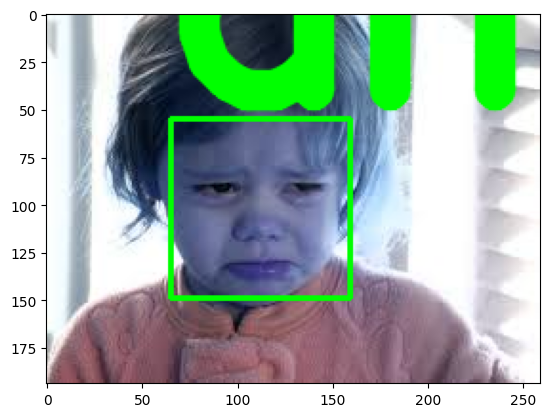

In [ ]:
import cv2
import cv2.data
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Emotions labels
emotions = ['happy', 'surprise', 'sad', 'anger', 'disgust', 'fear']

model = ResEmoteNet().to(device)
checkpoint = torch.load('ResEmoteNet_JAFFE_best_model_0.001_16_0.95_0.0001.pth', weights_only=True)
model.load_state_dict(checkpoint)
model.eval()

transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)

# Settings for text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 5
font_color = (0, 255, 0)  # This is BGR color
thickness = 20
line_type = cv2.LINE_AA

max_emotion = ''

def detect_emotion(image):
    img_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(img_tensor)
        probabilities = F.softmax(outputs, dim=1)
    scores = probabilities.cpu().numpy().flatten()
    rounded_scores = [round(score, 2) for score in scores]
    return rounded_scores

def get_max_emotion(x, y, w, h, image):
    crop_img = image[y : y + h, x : x + w]
    pil_crop_img = Image.fromarray(crop_img)
    rounded_scores = detect_emotion(pil_crop_img)    
    max_index = np.argmax(rounded_scores)
    max_emotion = emotions[max_index]
    return max_emotion

def print_max_emotion(x, y, image, max_emotion):
    org = (x, y - 15)
    cv2.putText(image, max_emotion, org, font, font_scale, font_color, thickness, line_type)
    
def print_all_emotion(x, y, w, h, image):
    crop_img = image[y : y + h, x : x + w]
    pil_crop_img = Image.fromarray(crop_img)
    rounded_scores = detect_emotion(pil_crop_img)
    org = (x + w + 10, y - 20)
    for index, value in enumerate(emotions):
        emotion_str = (f'{value}: {rounded_scores[index]:.2f}')
        y = org[1] + 40
        org = (org[0], y)
        cv2.putText(image, emotion_str, org, font, font_scale, font_color, thickness, line_type)
    
def detect_bounding_box(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 25, minSize=(40, 40))

    for (x, y, w, h) in faces:
        # Draw bounding box on face
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        max_emotion = get_max_emotion(x, y, w, h, image)
        print("Max emotion: ", max_emotion)
        print_max_emotion(x, y, image, max_emotion)
        # print_all_emotion(x, y, w, h, image)
    
    return faces

# Load the image file
image = cv2.imread('cry.jpeg')
# Process the image
faces = detect_bounding_box(image)

# Display the processed image
plt.imshow(image)